In [97]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import projections
import matplotlib.pyplot as plt

originalfileloc = r'C:\Users\lenovo\Desktop\panda_datacleaning\youtube_datasets\youtube_og_frames\USvideos.csv'
df = pd.read_csv(originalfileloc)
df = df.copy()


<Figure size 864x576 with 0 Axes>

In [102]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(100, 100)

<Figure size 7200x7200 with 0 Axes>

In [93]:
originaljsonfileloc = r'C:\Users\lenovo\Desktop\panda_datacleaning\youtube_datasets\youtube_og_frames\US_category_id.json'

df_dum = pd.read_json(originaljsonfileloc)
id_arr={}
for i in range(0,len(df_dum['items'])):
    id_arr[ int(df_dum['items'][i]['id']) ] = df_dum['items'][i]['snippet']['title']

print(id_arr.keys())

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])


In [98]:
df['category_id'] = df['category_id'].map(id_arr)
df['category_id']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_id, Length: 40949, dtype: object

In [52]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [53]:
print(df.head(1))

      video_id trending_date                               title  \
0  2kyS6SvSYSE      17.14.11  WE WANT TO TALK ABOUT OUR MARRIAGE   

  channel_title  category_id              publish_time             tags  \
0  CaseyNeistat           22  2017-11-13T17:13:01.000Z  SHANtell martin   

    views  likes  dislikes  comment_count  \
0  748374  57527      2966          15954   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  


In [129]:
#df_ml = df['description','thumbnail_link','tags','description','likes','dislikes','views','title']
df_vdId = df['video_id']
df = df.drop(columns=['description','thumbnail_link','tags','description','video_id'])

In [12]:
print('is there any duplicate rows?',df.duplicated().sum(), '\n')
print('empty cells total', df.isna().sum().sum(),'\n')
print('null count per col:\n', df.isna().sum(),'\n')

is there any duplicate rows? 0 

empty cells total 0 

null count per col:
 trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64 



In [55]:
df = df.drop_duplicates(keep='first')

In [ ]:
#df['comments_disabled'] = df['comments_disabled'].replace([True,False] , ['1','0'])
#df['ratings_disabled'] = df['ratings_disabled'].replace([True,False] , ['1','0'])

In [123]:
df2 = pd.DataFrame()
df2[['publish_Date','publish_Time']] = df.publish_time.str.split('T').to_list()
df2[['publish_Year','publish_Month','publish_Day']] = df2.publish_Date.str.split('-').to_list()
df2[0:10]

,publish_Date,publish_Time,publish_Year,publish_Month,publish_Day
0,2017-11-13,17:13:01.000Z,2017,11,13
1,2017-11-13,07:30:00.000Z,2017,11,13
2,2017-11-12,19:05:24.000Z,2017,11,12
3,2017-11-13,11:00:04.000Z,2017,11,13
4,2017-11-12,18:01:41.000Z,2017,11,12
5,2017-11-13,19:07:23.000Z,2017,11,13
6,2017-11-12,05:37:17.000Z,2017,11,12
7,2017-11-12,21:50:37.000Z,2017,11,12
8,2017-11-13,14:00:23.000Z,2017,11,13
9,2017-11-13,13:45:16.000Z,2017,11,13


In [125]:
df2.publish_Year = df2.publish_Year.astype(int)
df2.publish_Month = df2.publish_Month.astype(int)
df2.publish_Day = df2.publish_Day.astype(int)

In [126]:
df = df.drop(columns='publish_time')

In [127]:
df = pd.concat([df,df2],axis=1)
df.head(3)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_Date,publish_Time,publish_Year,publish_Month,publish_Day
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01.000Z,2017,11,13
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00.000Z,2017,11,13
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24.000Z,2017,11,12


<AxesSubplot:xlabel='category_id', ylabel='Count'>

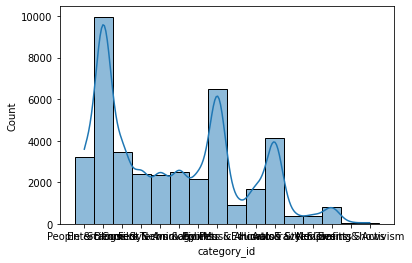

In [122]:
sns.histplot(data=df.category_id, kde=True)

<AxesSubplot:>

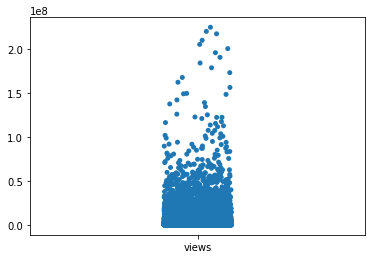

In [97]:
sns.stripplot(data=df[['views']])

In [85]:
df_mx = df.drop(columns='category_id')
df_mx = df_mx.corr()

<AxesSubplot:>

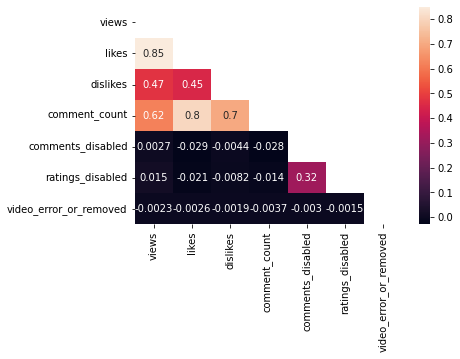

In [130]:
mask=np.zeros_like(df_mx)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_mx, annot=True, cmap='rocket', mask=mask)

<AxesSubplot:>

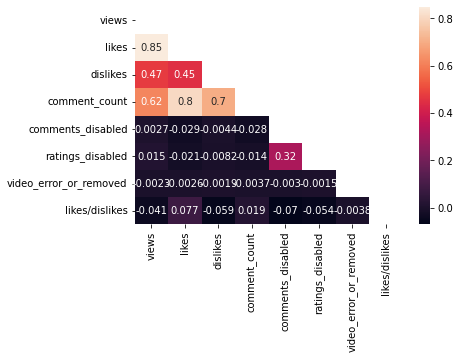

In [88]:
df3 = pd.DataFrame()
df3 = df.copy()
#df3[df4.dislikes == 0].dislikes =1
df3['dislikes'] = df3['dislikes'].replace([0],[1])
df3['likes/dislikes'] = df3.likes//df3.dislikes
df3 = df3.drop(columns='category_id')
#df3[ df.dislikes == 1]
df3_mx = df3.corr()
mask=np.zeros_like(df3_mx)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df3_mx, annot=True, cmap='rocket', mask=mask)